# Assigned Work September 20, due September 25 (2017)
## Calculate and plot the pressure scale height for a stellar model at the tip of the RGB
## Add plots of density and temperature as a function of radius and mass

In [2]:
%pylab 
from nugridpy import nugridse as mp
from nugridpy import mesa as ms
import numpy as np
import matplotlib.pyplot as plt

data_dir="/data/nugrid_apod2/"    

ms.set_nugrid_path(data_dir)
mp.set_nugrid_path(data_dir)

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [3]:
Mstar = 6
Zstar = 0.02

s=ms.star_log(mass=Mstar,Z=Zstar)

nugrid_path = /data/nugrid_apod2/
closest set is set1.2 (Z = 0.02)
closest mass is 6.0
Using old star.logsa file ...
 reading ...100% 



In [4]:
#Quantities we can plot against each other
s.cols

{'TP_state': 145,
 'burn_c': 139,
 'burn_n': 140,
 'burn_o': 141,
 'burn_qtop_1': 65,
 'burn_qtop_10': 83,
 'burn_qtop_11': 85,
 'burn_qtop_12': 87,
 'burn_qtop_13': 89,
 'burn_qtop_14': 91,
 'burn_qtop_15': 93,
 'burn_qtop_16': 95,
 'burn_qtop_17': 97,
 'burn_qtop_18': 99,
 'burn_qtop_19': 101,
 'burn_qtop_2': 67,
 'burn_qtop_20': 103,
 'burn_qtop_3': 69,
 'burn_qtop_4': 71,
 'burn_qtop_5': 73,
 'burn_qtop_6': 75,
 'burn_qtop_7': 77,
 'burn_qtop_8': 79,
 'burn_qtop_9': 81,
 'burn_type_1': 64,
 'burn_type_10': 82,
 'burn_type_11': 84,
 'burn_type_12': 86,
 'burn_type_13': 88,
 'burn_type_14': 90,
 'burn_type_15': 92,
 'burn_type_16': 94,
 'burn_type_17': 96,
 'burn_type_18': 98,
 'burn_type_19': 100,
 'burn_type_2': 66,
 'burn_type_20': 102,
 'burn_type_3': 68,
 'burn_type_4': 70,
 'burn_type_5': 72,
 'burn_type_6': 74,
 'burn_type_7': 76,
 'burn_type_8': 78,
 'burn_type_9': 80,
 'center_c12': 130,
 'center_h1': 128,
 'center_he4': 129,
 'center_mu': 126,
 'center_o16': 131,
 'center_y

<IPython.core.display.Javascript object>


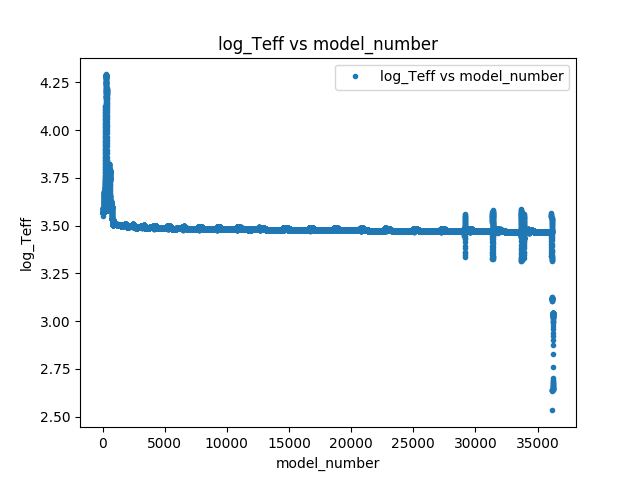

In [5]:
ifig=1;close(ifig);figure(ifig)
s.plot('model_number','log_Teff')

<IPython.core.display.Javascript object>


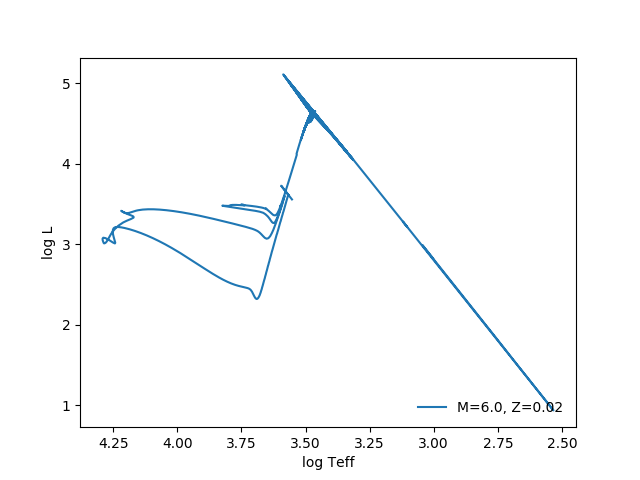

In [6]:
ifig=2;close(ifig);figure(ifig)
s.hrd_new()
legend(loc='lower right').draw_frame(False)

## Tip of RGB located at Teff=3.581 > 3.584
## Corresponding model numbers = 398 - 460 ; Choose 425 (arbitrarily)

In [7]:
pt=mp.se(mass=Mstar,Z=Zstar)
pt.se.hattrs

nugrid_path = /data/nugrid_apod2/
closest set is set1.2 (Z = 0.02)
closest mass is 6.0
Searching files, please wait.......
Reading preprocessor files
File search complete.


[u'HDF5_version',
 u'SE_version',
 u'numcodev',
 u'codev',
 u'modname',
 u'mini',
 u'zini',
 u'rotini',
 u'overini',
 u'zisnb',
 u'age_unit',
 u'mass_unit',
 u'radius_unit',
 u'rho_unit',
 u'temperature_unit',
 u'dcoeff_unit']

In [8]:
pt.se.hattrs
pt.get('radius_unit')

1.0

## Density vs Radius

<IPython.core.display.Javascript object>


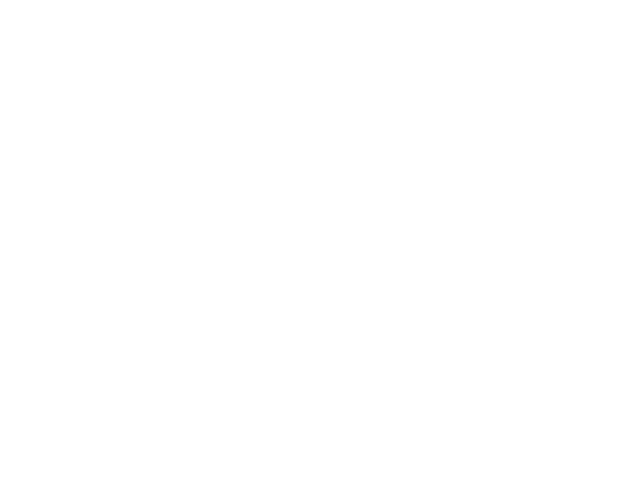

 reading ['radius']...100%0.107716083527


In [9]:
ifig=3;close(ifig);figure(ifig)
pt.plot('radius','rho',fname=425,logx=True,logy=True)

## Density vs Mass

<IPython.core.display.Javascript object>


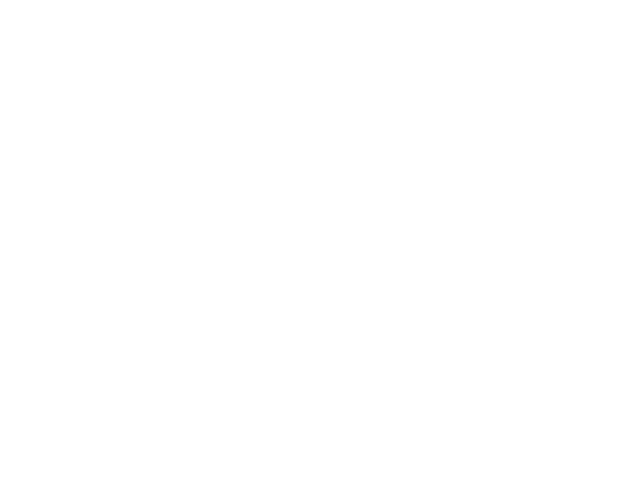

 reading ['mass']...100%0.090215921402


In [10]:
ifig=3;close(ifig);figure(ifig)
pt.plot('mass','rho',fname=425,logx=True,logy=True)

## Temperature vs Radius

<IPython.core.display.Javascript object>


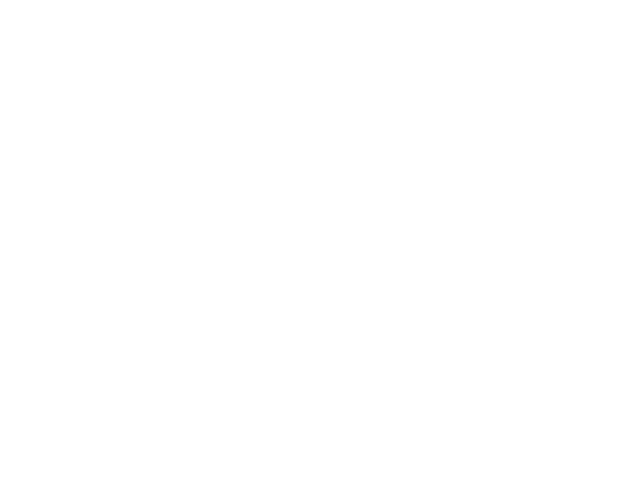

 reading ['radius']...100%0.0738608837128


In [11]:
ifig=3;close(ifig);figure(ifig)
pt.plot('radius','temperature',fname=425,logx=True,logy=True)

## Temperature vs Mass

<IPython.core.display.Javascript object>


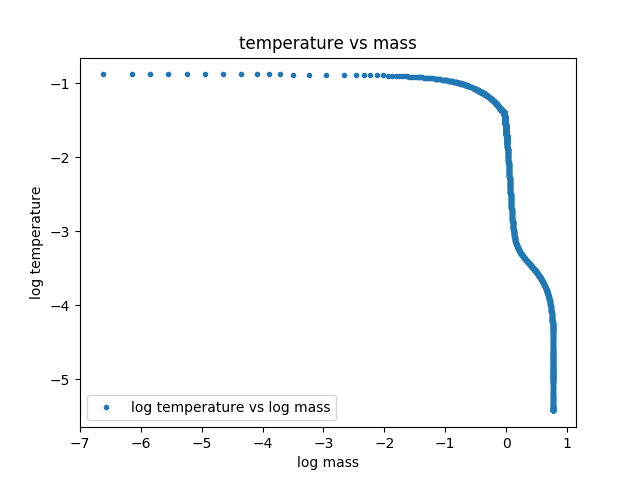

 reading ['mass']...100%...100%0.0761728286743


In [12]:
ifig=3;close(ifig);figure(ifig)
pt.plot('mass','temperature',fname=425,logx=True,logy=True)

# Pressure Scale Height
From derivations done previously in class:

$H_p = \frac{R^2k_BT}{GMm_p\mu}$

where T is temperature, M is mass, R is radius

In [13]:
cyc=425

G =6.67259e-8 #cm^3 g^-1 s^-2 
msun = 1.9891e33 #Msun in g
kb = 13806e-16 #erg K^-1
mp = 1.6726e-24 # g
u = 0.5 #to start  CHANGE LATER
rsun = 7e10 #cm

r = pt.get(cyc,'radius')*rsun #cm
m = pt.get(cyc,'mass')*msun #g
t = pt.get(cyc,'temperature') #K

Hp = np.power(r,2)*kb*t/(G*m*mp*u)

 reading ['temperature']...100%

<IPython.core.display.Javascript object>


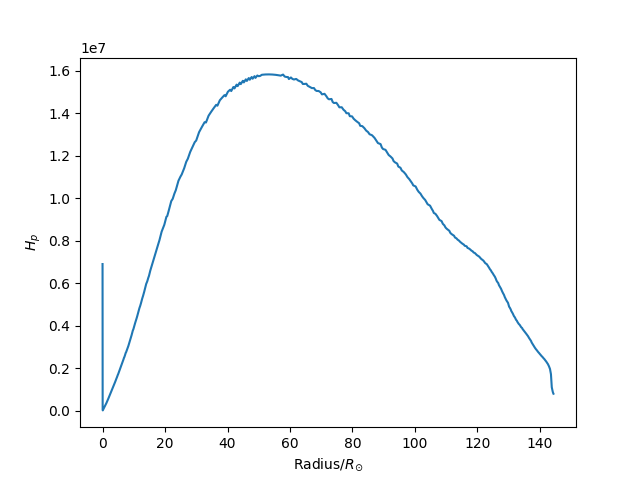

In [17]:
ifig=4;close(ifig);figure(ifig)
plt.plot(r/rsun,Hp)
plt.xlabel('Radius/$R_{\odot}$')
plt.ylabel('$H_p$')